Fonte de dados: CAMELS-BR

C:\Users\dodo_\AppData\Local\Temp\ipykernel_2940\1717116467.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])


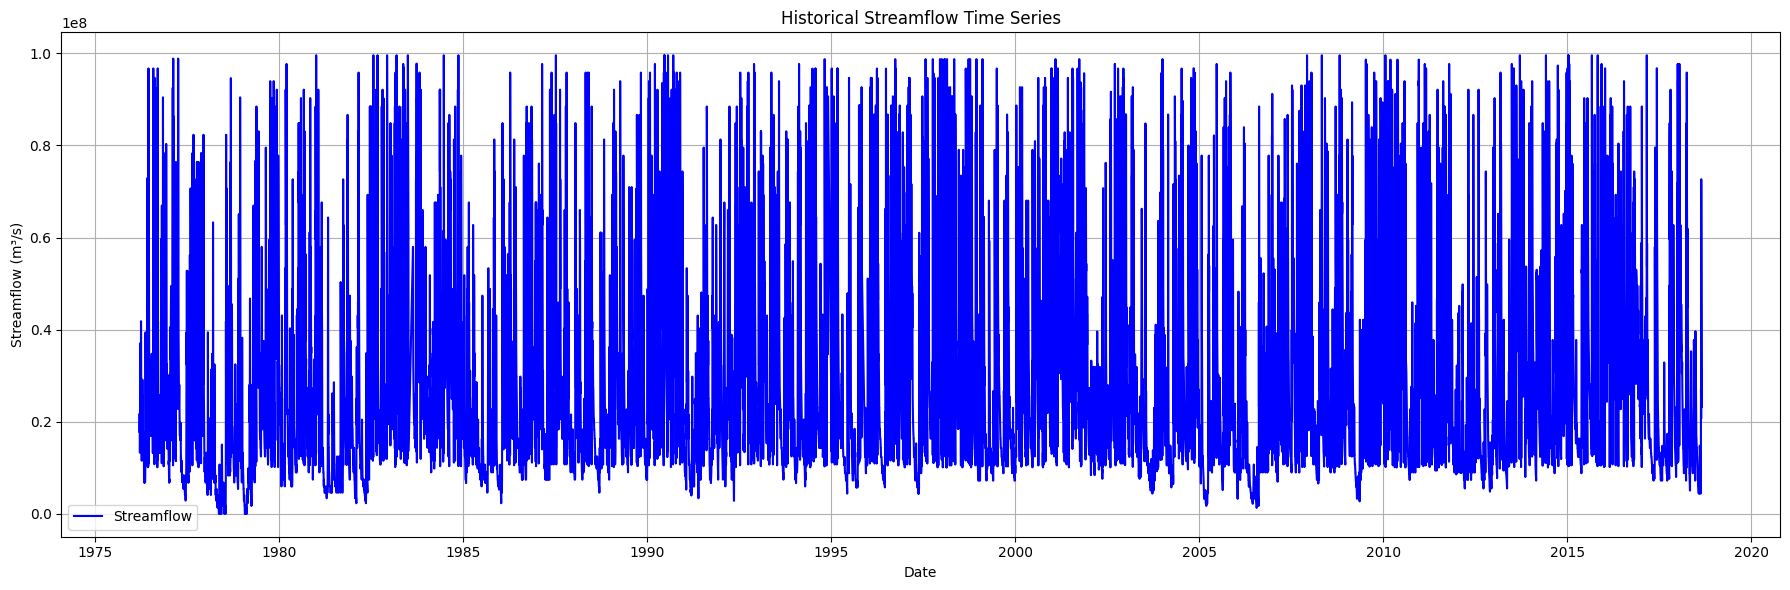

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo de origem
file_path = 'C:/Users/dodo_/Documents/ENS5165_202402/ENS5165_202402/pyEnv/files/72715000_streamflow_m3s - TANGARA.xlsx'

# Carregar os dados do Excel
df = pd.read_excel(file_path, sheet_name='72715000_streamflow_m3s')

# Converte a coluna 'streamflow' para numérico, tratando 'NaN' como valores ausentes
df['streamflow'] = pd.to_numeric(df['streamflow'], errors='coerce')

# Remove as linhas com valores NaN em 'streamflow'
df_cleaned = df.dropna(subset=['streamflow'])

# Cria uma coluna de data combinando 'year', 'month', e 'day'
df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])

# Plota a série histórica de vazão
plt.figure(figsize=(18, 6))
plt.plot(df_cleaned['date'], df_cleaned['streamflow'], label='Streamflow', color='b')
plt.title('Historical Streamflow Time Series')
plt.xlabel('Date')
plt.ylabel('Streamflow (m³/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\dodo_\AppData\Local\Temp\ipykernel_2940\2325192420.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])
C:\Users\dodo_\AppData\Local\Temp\ipykernel_2940\2325192420.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['streamflow_30d_ma'] = df_cleaned['streamflow'].rolling(window=30).mean()


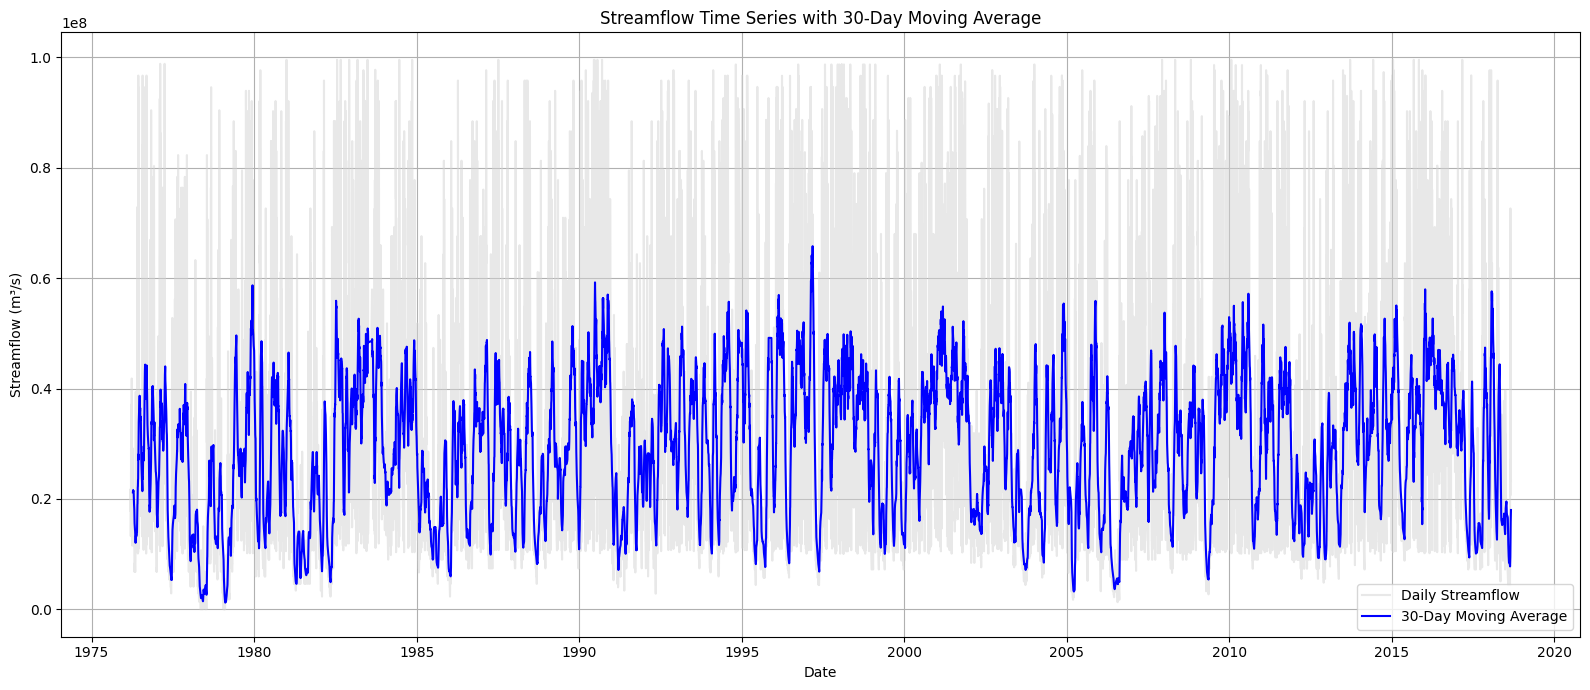

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo de origem
file_path = 'C:/Users/dodo_/Documents/ENS5165_202402/ENS5165_202402/pyEnv/files/72715000_streamflow_m3s - TANGARA.xlsx'

# Carregar os dados do Excel
df = pd.read_excel(file_path, sheet_name='72715000_streamflow_m3s')

# Converte a coluna 'streamflow' para numérico, tratando 'NaN' como valores ausentes
df['streamflow'] = pd.to_numeric(df['streamflow'], errors='coerce')

# Remove as linhas com valores NaN em 'streamflow'
df_cleaned = df.dropna(subset=['streamflow'])

# Cria uma coluna de data combinando 'year', 'month', e 'day'
df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])

# Calcula uma média móvel de 30 dias
df_cleaned['streamflow_30d_ma'] = df_cleaned['streamflow'].rolling(window=30).mean()

# Plota a série histórica com a média móvel
plt.figure(figsize=(16, 7))

# Série original
plt.plot(df_cleaned['date'], df_cleaned['streamflow'], label='Daily Streamflow', color='lightgray', alpha=0.5)

# Série com média móvel de 30 dias
plt.plot(df_cleaned['date'], df_cleaned['streamflow_30d_ma'], label='30-Day Moving Average', color='blue')

# Configuração do gráfico
plt.title('Streamflow Time Series with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Streamflow (m³/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
